In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import app_functions as af

In [2]:
pivoted_df = pd.read_csv('../data/pivoted_data/pivoted_EV.csv',index_col=0)
prices_csv_filepath = '../data\Final Data\PriceClose.csv'
return_notna_graph = False
n_quantiles = 10

In [6]:
rents_dict = af.rank_data(pivoted_df,prices_csv_filepath,n_quantiles, return_dict=True)

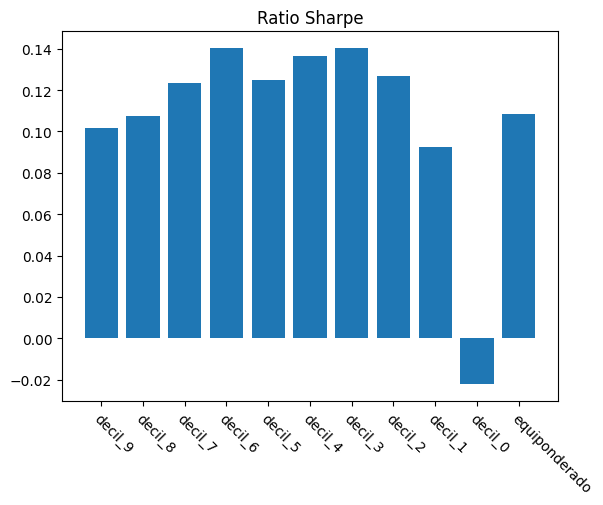

In [22]:
af.plot_sharpe(rents_dict)

In [10]:
len_input = len(pivoted_df)

##inecesario si solo se pasan datos limpios##
##se podria hacer para que filter_data fuese quien guarde en Final Data##
pivoted_df = pivoted_df.dropna(axis=0,how='all').dropna(axis=1,how='all')
pivoted_df = pivoted_df.loc[pivoted_df.notna().sum(axis=1)>200]

In [11]:
ranked_df = pivoted_df.copy()
###### HAY QUE HACER DE FORMA VECTORIZADA #########
for date,prices in pivoted_df.T.items():
    ranked_df.loc[date] = pd.qcut(prices,n_quantiles,duplicates='drop',labels=False)

In [12]:
def deciles_lists(df):
    diccionario = {}
    for i in range(n_quantiles):
        diccionario[f'decil_{i}'] = {}
        for date,ranks in df.T.items():
            diccionario[f'decil_{i}'][date] = ranks.loc[ranks == i].index.tolist()
    return diccionario

In [13]:
precios_df = pd.read_csv(prices_csv_filepath,index_col='CallDate')

In [14]:
extra_stocks = set(precios_df.columns)-set(ranked_df.columns)

ranked_df = ranked_df.loc[:,list(set(precios_df.columns)-extra_stocks)]
precios_df = precios_df.loc[:,ranked_df.columns]

try:
    ranked_df.drop(index='2000-01-01',inplace=True)
except KeyError:
    pass

In [15]:
deciles_dict = deciles_lists(ranked_df)

In [16]:
rentabilidad_acciones_df = precios_df.pct_change()

In [17]:
rentabilidades_dict = {}
rentabilidades_dict['equiponderado'] = {}
for decil,fechas in deciles_dict.items():
    rentabilidades_dict[decil] = {}
    for fecha, stocks in fechas.items():
        rentabilidades_dict[decil][fecha] = rentabilidad_acciones_df.loc[fecha,stocks].mean()
        rentabilidades_dict['equiponderado'][fecha] = rentabilidad_acciones_df.loc[fecha].mean()

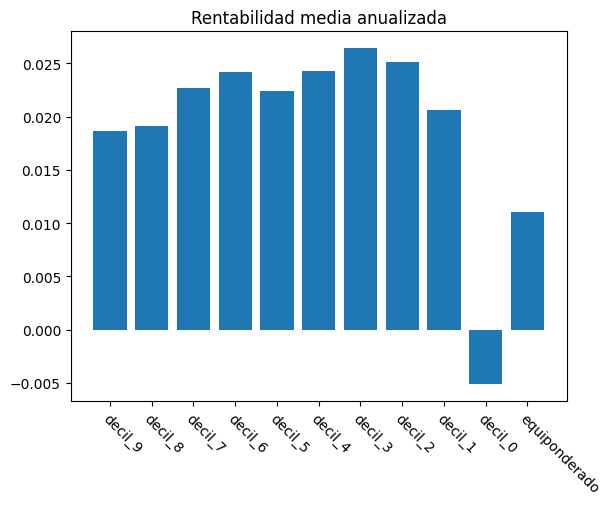

In [20]:
af.plot_rentabilidad_media(rentabilidades_dict)

In [13]:
from app_functions import plot_NAV_absoluto

In [72]:
deciles_df = pd.DataFrame(columns = ['equiponderado'])
lista_equiponderado = []
for i in range(n_quantiles):
    rents_list = []
    for date,ranks in ranked_df.T.items():
        rents_list.append(rentabilidad_acciones_df.loc[date,ranks == i].mean())
    deciles_df[f'decil_{i}'] = rents_list
deciles_df['equiponderado'] = deciles_df.mean(axis=1)
deciles_df.set_index(ranked_df.index).to_dict()

In [82]:
%%timeit -n1000
deciles_df.set_index(ranked_df.index).to_dict()

2.42 ms ± 80.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [70]:
deciles_df = pd.DataFrame(columns = ['equiponderado'])
lista_equiponderado = []
for date,ranks in ranked_df.T.items():
    rents_list = []
    for i in range(n_quantiles):
        rents_list.append(rentabilidad_acciones_df.loc[date,ranks == i].mean())
    deciles_df[f'decil_{i}'] = rents_list


In [79]:
deciles_df.set_index(ranked_df.index).to_dict()

dict_keys(['equiponderado', 'decil_0', 'decil_1', 'decil_2', 'decil_3', 'decil_4', 'decil_5', 'decil_6', 'decil_7', 'decil_8', 'decil_9'])

<AxesSubplot: >

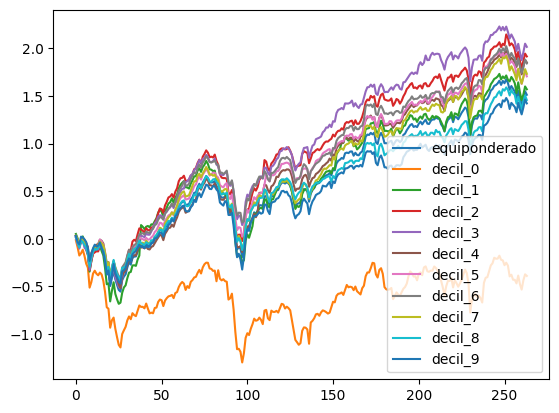

In [74]:
deciles_df.cumsum().plot()

In [60]:
def deciles_lists(df):
    diccionario = {}
    for i in range(n_quantiles):
        diccionario[f'decil_{i}'] = {}
        for date,ranks in df.T.items():
            diccionario[f'decil_{i}'][date] = ranks.loc[ranks == i].index.tolist()
    return diccionario
deciles_dict = deciles_lists(ranked_df)

In [61]:
rentabilidades_dict = {}
rentabilidades_dict['equiponderado'] = {}
for decil,fechas in deciles_dict.items():
    rentabilidades_dict[decil] = {}
    for fecha, stocks in fechas.items():
        rentabilidades_dict[decil][fecha] = rentabilidad_acciones_df.loc[fecha,stocks].mean()
        rentabilidades_dict['equiponderado'][fecha] = rentabilidad_acciones_df.loc[fecha].mean()

In [65]:
df = pd.DataFrame(rentabilidades_dict)

In [69]:
rentabilidad_acciones_df

,SCTN.L^D08,CNPP.PA^F22,TNET.BR,TELIA.ST,ALIVsdb.ST,CASS.MI^H22,PFC.L,XTA.L^E13,PHARP.L,AMPF.MI,...,CNHI.MI,AIRP.PA,UNPI_p.MI^F15,BFP.L^B05,CAV1V.HE,AUTOA.L,GAW.L,STERV.HE,AGG.L^D05,ABE.MC^H18
CallDate,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,-0.075751,-0.152079,NaN,NaN,-0.043122,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.046330,NaN,NaN,NaN,NaN,NaN,-0.139226,NaN,-0.065285
2000-03-01,0.074330,-0.112903,NaN,NaN,-0.001974,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.104101,NaN,NaN,NaN,NaN,NaN,-0.312081,NaN,-0.038803
2000-04-01,0.063380,0.189091,NaN,NaN,0.045988,NaN,NaN,NaN,NaN,NaN,...,NaN,0.021831,NaN,NaN,NaN,NaN,NaN,0.092683,NaN,0.134948
2000-05-01,0.110599,-0.019572,NaN,NaN,0.066474,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.013094,NaN,NaN,NaN,NaN,NaN,0.017857,NaN,-0.014228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,0.000000,0.000000,0.0,-0.032713,0.000000,0.0,0.0,0.0,0.0,-0.214550,...,-0.008703,-0.067753,0.0,0.0,0.0,-0.050470,-0.122649,-0.047524,0.0,0.000000
2022-10-01,0.000000,0.000000,0.0,-0.157189,0.000000,0.0,0.0,0.0,0.0,0.055730,...,-0.027592,-0.048559,0.0,0.0,0.0,-0.199174,-0.189438,-0.086532,0.0,0.000000
2022-11-01,0.000000,0.000000,0.0,-0.092512,0.000000,0.0,0.0,0.0,0.0,-0.067286,...,0.120808,0.121470,0.0,0.0,0.0,0.059601,0.142719,0.027884,0.0,0.000000


In [66]:
df.equiponderado

2001-02-01    0.023300
2001-03-01   -0.050118
2001-04-01   -0.048436
2001-05-01    0.049638
2001-06-01    0.015488
                ...   
2022-09-01   -0.037688
2022-10-01   -0.029942
2022-11-01    0.033503
2022-12-01    0.032318
2023-01-01   -0.015860
Name: equiponderado, Length: 264, dtype: float64

In [68]:
df.drop(columns='equiponderado').mean(axis=1)

2001-02-01    0.022849
2001-03-01   -0.053055
2001-04-01   -0.054206
2001-05-01    0.053569
2001-06-01    0.016219
                ...   
2022-09-01   -0.086358
2022-10-01   -0.069845
2022-11-01    0.077392
2022-12-01    0.074755
2023-01-01   -0.036888
Length: 264, dtype: float64

In [ ]:
ranked_df.loc[ranked_df == 0]

In [ ]:
%%time
deciles_df = pd.DataFrame(columns = ['empty'])

In [ ]:

test_df = pd.DataFrame(columns=ranked_df.columns)

In [ ]:
%%time
test_df.loc[date] = rentabilidad_acciones_df.T.loc[ranks == i][date]

In [ ]:
deciles_df[f'decil_{i}'] = test_df.mean(axis = 1)

In [ ]:
deciles_df

In [ ]:
test_df

In [ ]:
rentabilidades_dict['decil_1']

In [ ]:
test_df.mean(axis=1)

In [ ]:
rentabilidad_acciones_df.T.loc[ranked_df.iloc[0,:] == 1]['2001-02-01']

In [ ]:
ranked_df

In [ ]:
deciles_dict['decil_1']['2001-02-01'] == ls